In [1]:
#Import libraries.

from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM 
from keras.models import Sequential
import matplotlib.pyplot as plt
import pandas_datareader as web
from termcolor import colored
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import math

plt.style.use('dark_background')
warnings.filterwarnings('ignore')
color_pal = sns.color_palette("husl",9)

In [2]:
# Get the stock 

df = web.DataReader('AAPL',data_source='yahoo',start='2014-01-02',end='2020-12-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,19.893929,19.715000,19.845715,19.754642,234684800.0,17.468655
2014-01-03,19.775000,19.301071,19.745001,19.320715,392467600.0,17.084938
2014-01-06,19.528570,19.057142,19.194643,19.426071,412610800.0,17.178104
2014-01-07,19.498571,19.211430,19.440001,19.287144,317209200.0,17.055254
2014-01-08,19.484285,19.238930,19.243214,19.409286,258529600.0,17.163260
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,130.802322
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.480560
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.676666


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,130.802322
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.480560
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.676666
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,132.536850
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,131.515961


In [4]:
# Showing the number of rows and columns .
print(colored('ROWS & COLUMNS','red',attrs=['bold','underline']))
print(colored(f'Number of rows in the data-set are : {df.shape[0]}','blue',attrs=['bold']))
print(colored(f'Number of columns in the data-set are : {df.shape[1]}','blue',attrs=['bold']))

ROWS & COLUMNS
Number of rows in the data-set are : 1763
Number of columns in the data-set are : 6


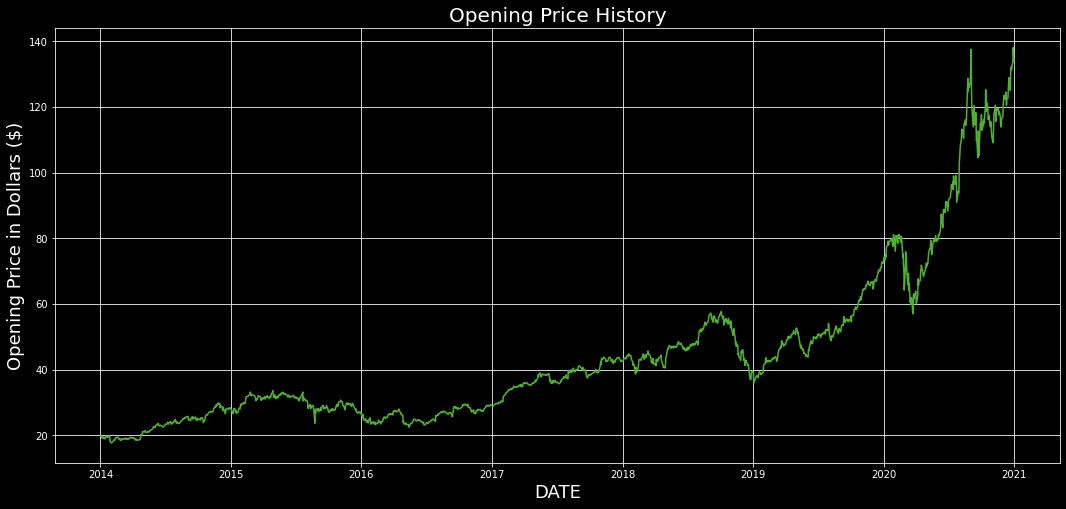

In [5]:
# Visualizing the opening price
plt.figure(figsize=(18,8))
plt.title('Opening Price History',fontsize=20)
plt.plot(df['Open'],color=color_pal[3])
plt.xlabel('DATE',fontsize=18)
plt.ylabel('Opening Price in Dollars ($)',fontsize=18)
plt.grid()

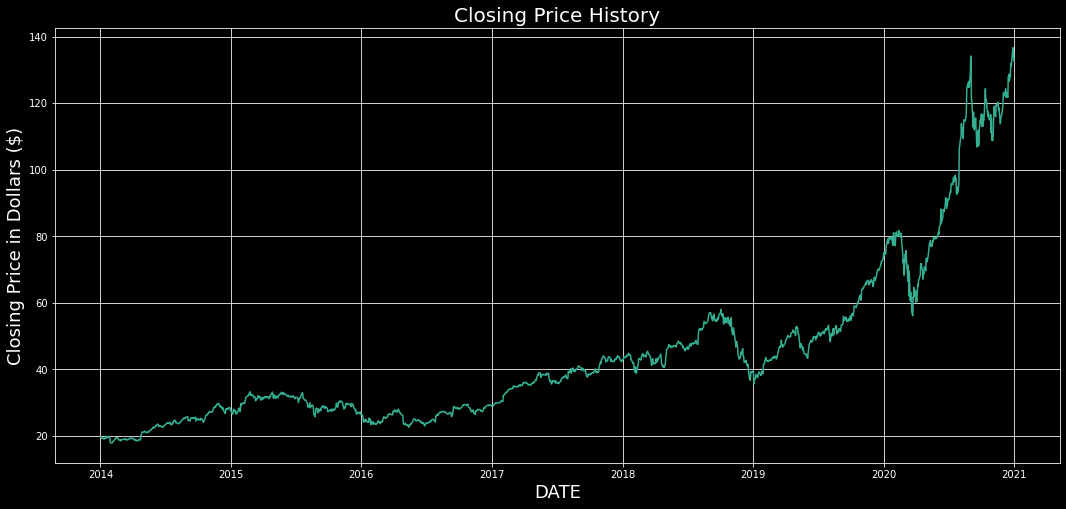

In [6]:
# Visualizing the closing price 
plt.figure(figsize=(18,8))
plt.title('Closing Price History',fontsize=20)
plt.plot(df['Close'],color=color_pal[4])
plt.xlabel('DATE',fontsize=18)
plt.ylabel('Closing Price in Dollars ($)',fontsize=18)
plt.grid()

# We will now perform EDA to predict the closing stock price of apple .

In [7]:
# Cerating a new dataframe with the closing column
data = df.filter(['Close'])
# Convert it into a numpy array
dataset = data.values
# Getting about 80% of rows to train the model
training_data_len = math.ceil(len(dataset)*0.8)

print(colored(f'80% of the whole data-set is : {training_data_len}','green',attrs=['bold','underline']))

80% of the whole data-set is : 1411


In [8]:
dataset.shape

(1763, 1)

So training set sould have 1411 values for 80% of data .

In [9]:
# Scaling the data b/w 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data.shape

(1763, 1)

In [10]:
# Creating the Training data set 
train_data = scaled_data[:training_data_len, :]

X_train= []
Y_train= []

# Very important keep in mind the below loop will not go till 1411 .
# It will go till range of 1411 but the values wull range till 1351 since we are subtracting 60 .

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i,0])
    Y_train.append(train_data[i,0])
    if i<=61:
        print(X_train)
        print(Y_train)
        print()

[array([0.01603287, 0.01238153, 0.01326806, 0.01209904, 0.01312683,
       0.01104119, 0.00996532, 0.01080379, 0.01400736, 0.01730408,
       0.01636946, 0.01228836, 0.01481276, 0.01554603, 0.01694946,
       0.01391119, 0.01524249, 0.00201952, 0.00029151, 0.        ,
       0.00024643, 0.00052591, 0.0027077 , 0.00384969, 0.00382565,
       0.00598039, 0.00877826, 0.01087291, 0.01086088, 0.01341833,
       0.01328609, 0.01388714, 0.01129664, 0.00942739, 0.00765431,
       0.0083455 , 0.00669565, 0.00528018, 0.00838158, 0.00795183,
       0.00840862, 0.00945443, 0.00979102, 0.00930718, 0.00921402,
       0.00935828, 0.01091196, 0.01106824, 0.00927713, 0.00748603,
       0.00810209, 0.00950252, 0.00946045, 0.00869111, 0.00994428,
       0.01184359, 0.01358662, 0.01202089, 0.01132368, 0.01114337])]
[0.011107317693703933]

[array([0.01603287, 0.01238153, 0.01326806, 0.01209904, 0.01312683,
       0.01104119, 0.00996532, 0.01080379, 0.01400736, 0.01730408,
       0.01636946, 0.01228836, 0.0

In [11]:
# Convert X_train Y_train into numpy arrays 
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [12]:
# Reshape the data because the LSTM model expects # dimensional data
# Right now it is 2 Dimensional.
X_train.shape

(1351, 60)

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1351, 60, 1)

# Build the LSTM Model .

In [14]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# Train the model
model.fit(X_train,Y_train,batch_size=1,epochs=1)

1351/1351 [==============================] - 21s 13ms/step - loss: 4.1813e-04


In [17]:
# Create test data set
# The test data set will range from 1351 which was our training data range till 1763
# Remenber to subtract 60 
test_data = scaled_data[training_data_len-60:,:]

X_test = []

# The Y_test values are not scaled here they are the actual values.
Y_test = dataset[training_data_len:, :]


for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])


In [18]:
len(X_test)

352

In [19]:
# Convert the data into numpy array 
X_test = np.array(X_test)

In [20]:
# Reshape the data 
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [21]:
# Get the models predicted price values .
predictions = model.predict(X_test)

# As our model is trained on scaled data it will give scaled results 
# So we need to unscale them

predictions = scaler.inverse_transform(predictions)

In [22]:
# Evaluating our model with RMSE (Lower the value better the model)
rmse = np.sqrt(np.mean(predictions-Y_test)**2)
print(colored(f'The ROOT MEAN SQUARE VALUE is : {rmse}','red',attrs=['bold'],on_color='on_blue'))

The ROOT MEAN SQUARE VALUE is : 2.403077732432972


**So the RMSE value is near zero so we cal say our model worked extremelyy well .**

# Plotting the data .

In [23]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

valid

,Close,Predictions
Date,,
2019-08-12,50.119999,50.064987
2019-08-13,52.242500,49.917393
2019-08-14,50.687500,50.019749
2019-08-15,50.435001,50.113934
2019-08-16,51.625000,50.174152
...,...,...
2020-12-24,131.970001,123.944351
2020-12-28,136.690002,124.764015
2020-12-29,134.869995,125.984871


# Visualizing the data

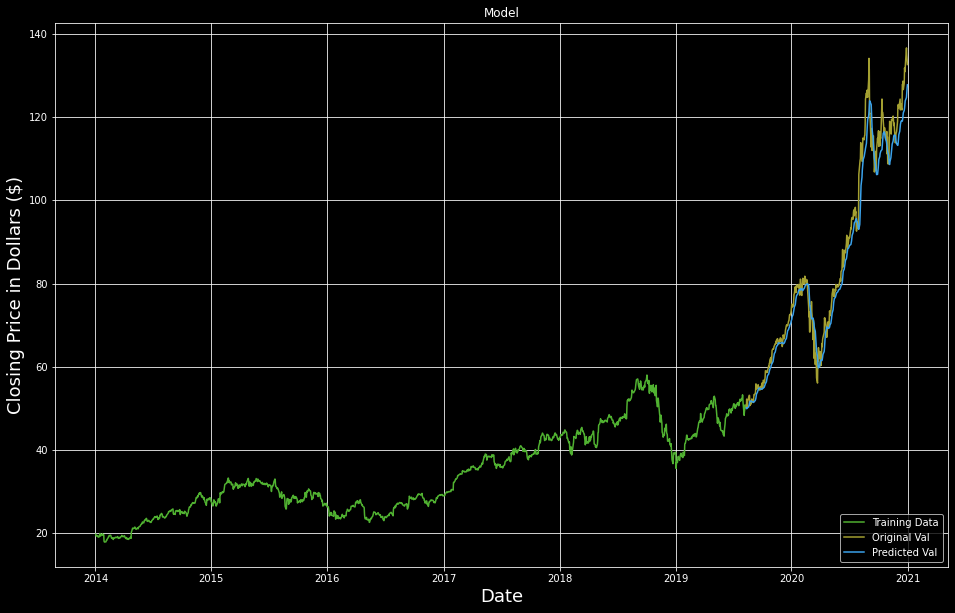

In [24]:
plt.figure(figsize=(16,10))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price in Dollars ($)',fontsize=18)
plt.plot(train['Close'],color=color_pal[3])
# plt.plot(valid[['Close','Predictions']])
plt.plot(valid['Close'],color=color_pal[2])
plt.plot(valid['Predictions'],color=color_pal[6])
# plt.axvline(x=0.4)
plt.legend(['Training Data','Original Val','Predicted Val'],loc='lower right')
plt.grid()
plt.show()

**From the above graph you can see that the green line indicates our training data and the yellow line indicates original values from the data set and the blue line indicates our predicted values which is very similar to the original values .**

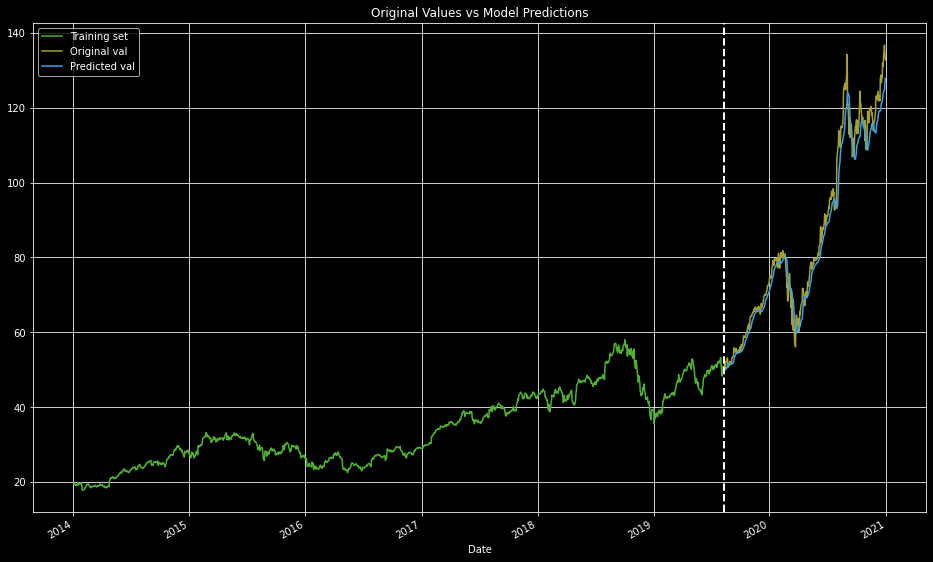

In [25]:
fig,ax = plt.subplots(figsize=(16,10))
train['Close'].plot(ax=ax,color=color_pal[3],label='Training set', title='Original Values vs Model Predictions')
valid['Close'].plot(ax=ax,color=color_pal[2],label='Original val')
valid['Predictions'].plot(ax=ax,color=color_pal[6],label='Predicted val')
ax.axvline('2019-08-12',color='white',ls='--',lw=2)
ax.legend(['Training set','Original val','Predicted val'])
plt.grid()

**The white line indicates the division between training and testing & prediction set.**